In [1]:
# чтобы изменения в других файлах автоматически подгружались в импорты
%load_ext IPython.extensions.autoreload
%autoreload 2

In [3]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime as dt

from data import FinData
from preprocessing import train_valid_split, train_valid_test_split
from model import CatboostFinModel

In [76]:
data = FinData("../datasets/T_yandex_10min.csv", column_names={'Yandex open' : 'open', 
                                          'Yandex close' : 'close', 
                                          'Yandex high' : 'high', 
                                          'Yandex low' : 'low', 
                                          'Yandex volume' : 'volume'})

windows_ma = [2, 4, 6, 18, 30, 500, 1000]

data.insert_time_features()
data.make_binary_class_target()
data.insert_rolling_means(windows_ma)
data.insert_exp_rolling_means(windows_ma)

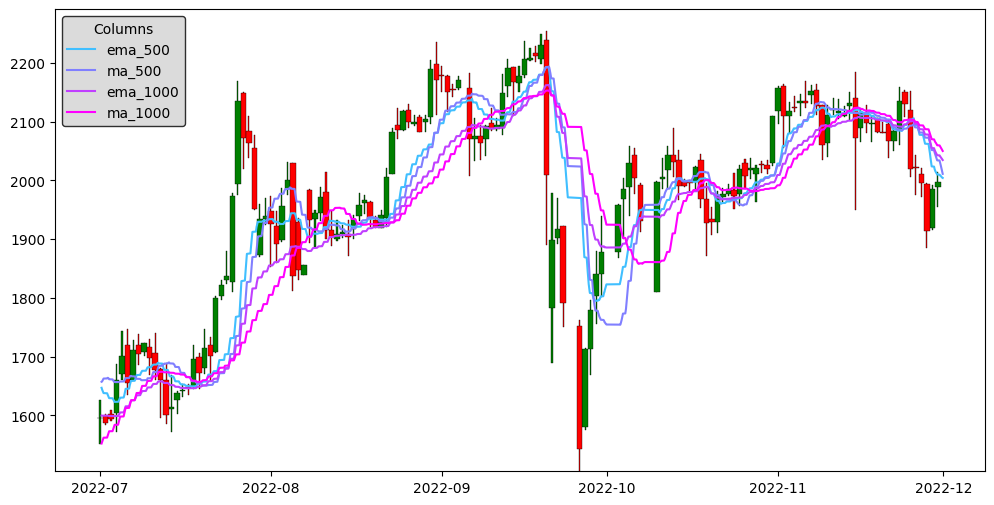

In [78]:
data.visualize_time_frame(2022, 7, 1, 2022, 12, 1, columns=['candle', 'ema_500', 'ma_500', 'ema_1000', 'ma_1000'], candle_freq='1d', cmap='cool', line_kwargs={'linewidth': 1.5})